<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


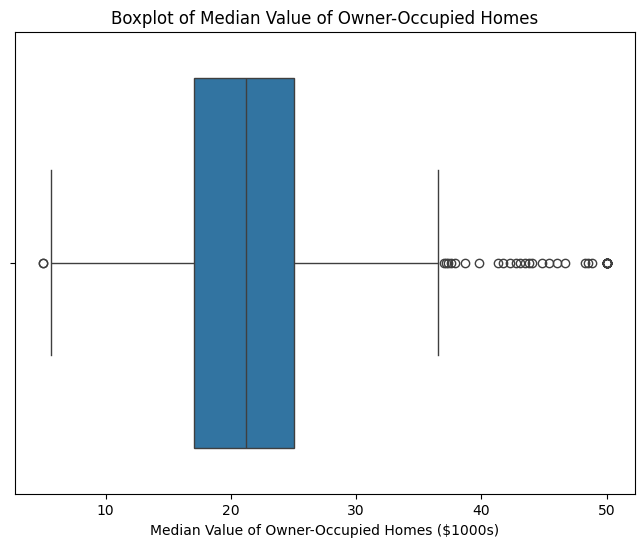

In [8]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.show()


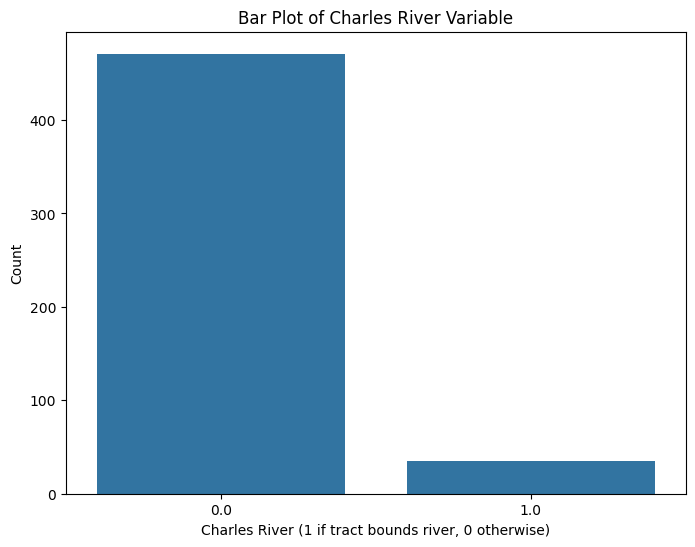

In [12]:
pyplot.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (1 if tract bounds river, 0 otherwise)')
pyplot.ylabel('Count')
pyplot.show()

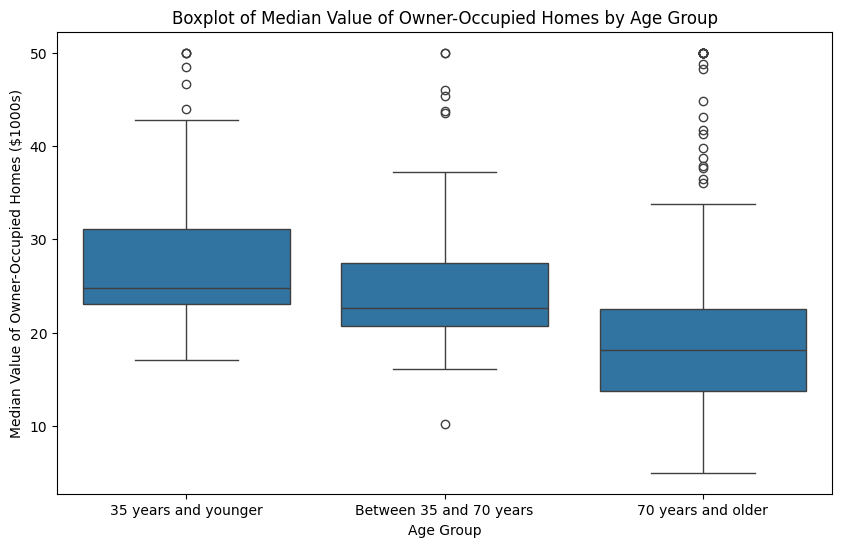

In [35]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Create boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)

# Add labels and title
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes ($1000s)')

# Show plot
pyplot.show()

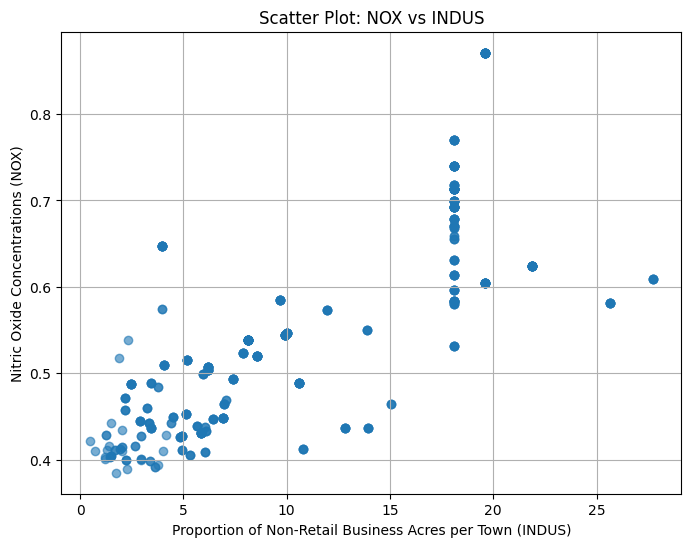

In [14]:
pyplot.figure(figsize=(8, 6))
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.6)
pyplot.title('Scatter Plot: NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.grid(True)
pyplot.show()

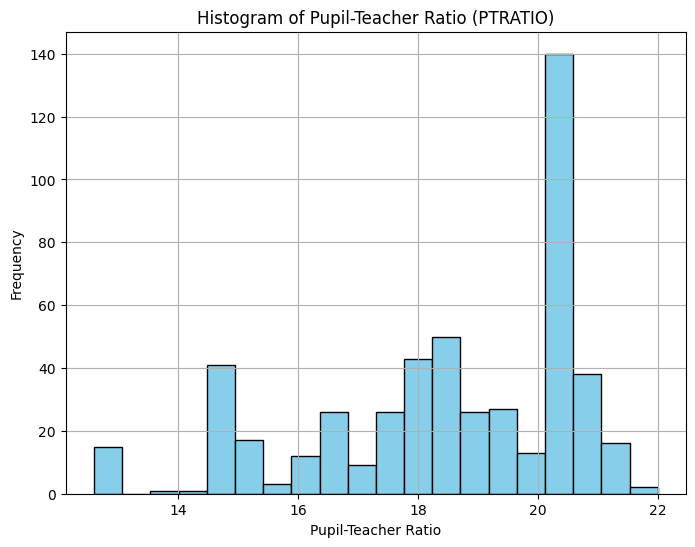

In [15]:
pyplot.figure(figsize=(8, 6))
pyplot.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.show()

In [31]:
import scipy.stats as stats

medv_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

print("Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River and those not bounded by the river. (μ1 = μ2) \n")
print("Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the river. (μ1 ≠ μ2) \n")
print("α = 0.05")
# t-test
t_statistic, p_value = stats.ttest_ind(medv_bounded, medv_not_bounded)

print("T-test statistic:", t_statistic)
print("p-value:", p_value,"\n")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.")

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River and those not bounded by the river. (μ1 = μ2) 

Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the river. (μ1 ≠ μ2) 

α = 0.05
T-test statistic: 3.996437466090509
p-value: 7.390623170519905e-05 

Conclusion: Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.


In [32]:
print("Null Hypothesis (H0): There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE). \n")
print("Alternative Hypothesis (H1): There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE). \n")
print("α = 0.05")
medv_age_0_35 = boston_df[boston_df['AGE'] <= 35]['MEDV']
medv_age_35_70 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
medv_age_70 = boston_df[boston_df['AGE'] > 70]['MEDV']

#ANOVA test
f_statistic, p_value = stats.f_oneway(medv_age_0_35, medv_age_35_70, medv_age_70)

print("ANOVA F-statistic:", f_statistic)
print("p-value:", p_value, "\n")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.")

Null Hypothesis (H0): There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE). 

Alternative Hypothesis (H1): There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE). 

α = 0.05
ANOVA F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15 

Conclusion: Reject the null hypothesis. There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.


In [33]:
print("Null Hypothesis (H0): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. \n")
print("Alternative Hypothesis (H1): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. \n")
print("α = 0.05")
# Pearson correlation
pearson_corr, p_value = stats.pearsonr( boston_df['NOX'],  boston_df['INDUS'])

print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", p_value, "\n")

# Check for significance
alpha = 0.05
if abs(pearson_corr) < 0.05:
    print("Conclusion: Pearson correlation coefficient is close to 0, suggesting no linear relationship between NOX and INDUS.")
else:
    if p_value < alpha:
        print("Conclusion: Reject the null hypothesis. There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")

Null Hypothesis (H0): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. 

Alternative Hypothesis (H1): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. 

α = 0.05
Pearson correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98 

Conclusion: Reject the null hypothesis. There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.


In [28]:
import statsmodels.api as sm
print("Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")
print("Alternative Hypothesis (H1): There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")
print("α = 0.05")

# Add a constant term 
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print the summary 
print(model.summary())


Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
Alternative Hypothesis (H1): There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
α = 0.05
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 16 May 2024   Prob (F-statistic):           1.21e-08
Time:                        17:10:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:  